# Differentiation

## Problem 1

In [1]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt

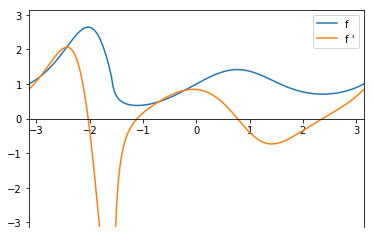

In [2]:
x = sy.symbols('x')
f = sy.lambdify(x, (sy.sin(x)+1)**(sy.sin(sy.cos(x))))
fprime = sy.lambdify(x, sy.diff((sy.sin(x)+1)**(sy.sin(sy.cos(x))),x))
xax = np.linspace(-np.pi,np.pi,200)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.plot(xax,f(xax),label="f")
plt.plot(xax,fprime(xax),label="f '")
plt.axis([-np.pi, np.pi, -np.pi, np.pi])
plt.legend()
plt.show()

## Problem 2

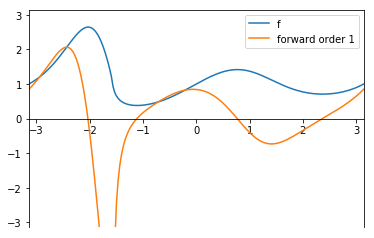

In [3]:
def forward1(f,x,h):
    return (f(x+h)-f(x))/h

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(xax,f(xax),label="f")
plt.plot(xax,forward1(f,xax,0.01),label="forward order 1")
plt.axis([-np.pi, np.pi, -np.pi, np.pi])
plt.legend()
plt.show()

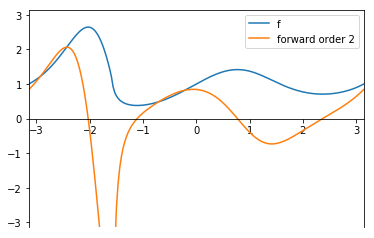

In [4]:
def forward2(f,x,h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(xax,f(xax),label="f")
plt.plot(xax,forward2(f,xax,0.01),label="forward order 2")
plt.axis([-np.pi, np.pi, -np.pi, np.pi])
plt.legend()
plt.show()

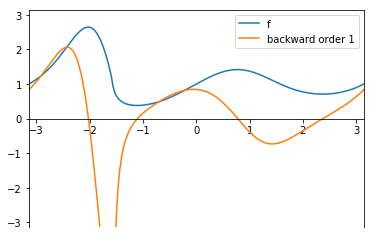

In [5]:
def backward1(f,x,h):
    return (f(x)-f(x-h))/h

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(xax,f(xax),label="f")
plt.plot(xax,backward1(f,xax,0.01),label="backward order 1")
plt.axis([-np.pi, np.pi, -np.pi, np.pi])
plt.legend()
plt.show()

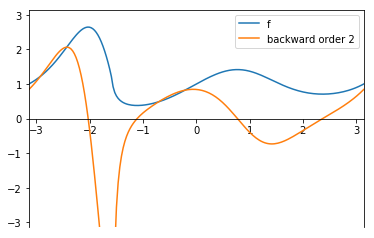

In [6]:
def backward2(f,x,h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(xax,f(xax),label="f")
plt.plot(xax,backward2(f,xax,0.01),label="backward order 2")
plt.axis([-np.pi, np.pi, -np.pi, np.pi])
plt.legend()
plt.show()

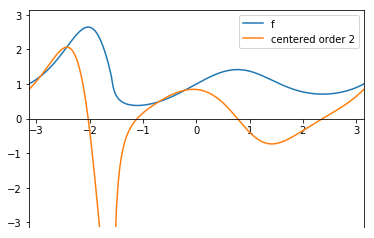

In [7]:
def centered2(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(xax,f(xax),label="f")
plt.plot(xax,centered2(f,xax,0.01),label="centered order 2")
plt.axis([-np.pi, np.pi, -np.pi, np.pi])
plt.legend()
plt.show()

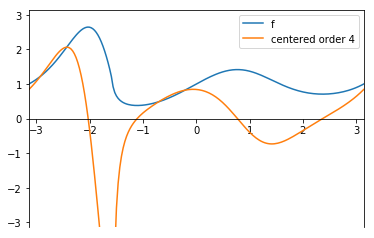

In [8]:
def centered4(f,x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(xax,f(xax),label="f")
plt.plot(xax,centered4(f,xax,0.01),label="centered order 4")
plt.axis([-np.pi, np.pi, -np.pi, np.pi])
plt.legend()
plt.show()

## Problem 3

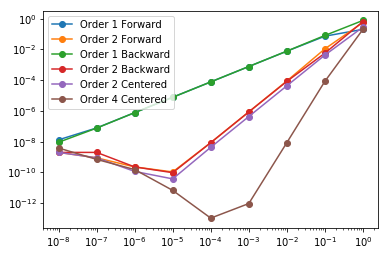

In [9]:
x0 = 1
h = np.logspace(-8,0,9)
f1err = np.absolute(fprime(x0) - forward1(f, x0, h))
f2err = np.absolute(fprime(x0) - forward2(f, x0, h))
b1err = np.absolute(fprime(x0) - backward1(f, x0, h))
b2err = np.absolute(fprime(x0) - backward2(f, x0, h))
c2err = np.absolute(fprime(x0) - centered2(f, x0, h))
c4err = np.absolute(fprime(x0) - centered4(f, x0, h))


plt.loglog(h, f1err, marker='o', label="Order 1 Forward")
plt.loglog(h, f2err, marker='o', label="Order 2 Forward")
plt.loglog(h, b1err, marker='o', label="Order 1 Backward")
plt.loglog(h, b2err, marker='o', label="Order 2 Backward")
plt.loglog(h, c2err, marker='o', label="Order 2 Centered")
plt.loglog(h, c4err, marker='o', label="Order 4 Centered")
plt.legend(loc="upper left")
plt.show()

## Problem 5

In [10]:
def appr_jacob(f, x, h):
    m = f(*sy.flatten(x)).shape[0]
    n = len(x)
    jacob = np.empty([m, n])
    for i in range(0, m):
        e = np.eye(1, m, i)
        jacob[i] = ((f(*sy.flatten(np.array((x + h*e)).flatten())) - 
                     f(*sy.flatten(np.array((x - h*e)).flatten())))/(2*h)).flatten()
    return jacob.T

In [11]:
x = sy.symbols('x')
y = sy.symbols('y')
fmat = sy.Matrix(([x**2, x**3-y]))
f = sy.lambdify((x,y),fmat)
jacob = fmat.jacobian((x,y))
fprime = sy.lambdify((x,y),jacob)

print("The accurate Jacobian:")
print(fprime(1,1))

print("The approximate Jacobian:")
print(appr_jacob(f,np.array((1,1)),0.01))

The accurate Jacobian:
[[ 2  0]
 [ 3 -1]]
The approximate Jacobian:
[[ 2.      0.    ]
 [ 3.0001 -1.    ]]


## Problem 6

In [12]:
 # pip install autograd

In [13]:
from autograd import numpy as anp    
from autograd import grad
from autograd import elementwise_grad
from matplotlib import pyplot as plt

In [14]:
def chebyshev(x,n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2*x*chebyshev(x,n-1) - chebyshev(x,n-2)

D:\Anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


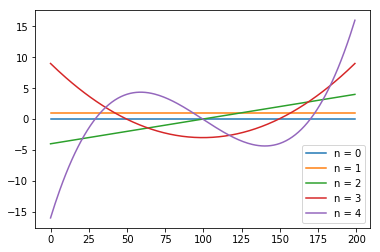

In [15]:
x = anp.linspace(-1,1,200)
d = elementwise_grad(chebyshev)
for i in range(0,5):
    plt.plot(d(x,i), label = 'n = ' + str(i))
plt.legend()
plt.show()